In [58]:
import pyforest
import subprocess

# get the path to the root of the repository
root_path = (
    subprocess.check_output(["git", "rev-parse", "--show-toplevel"])
    .decode("utf-8")
    .strip()
)
# set the working directory to the root of the repository
os.chdir(root_path)

# C. PCA plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='PC1', ylabel='PC2'>

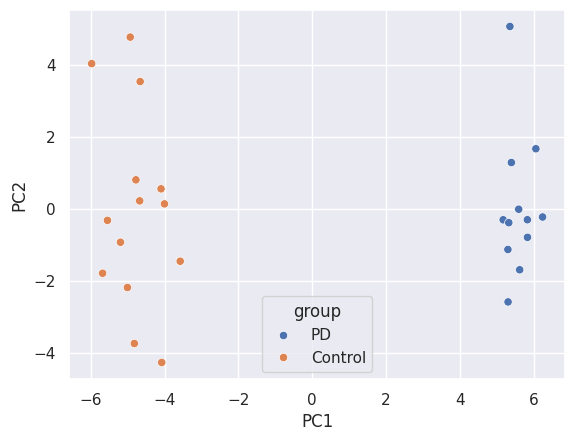

In [44]:
# import every txt in results/rMATs/sig and merge them
dir = "results/rMATs/sig"
files = os.listdir(dir)

dfs = []
for f in files:
    if f.endswith(".txt"):
        df = pd.read_csv(f"{dir}/{f}", sep="\t")
        # df['file'] = f.split('.')[0]
        dfs.append(df)
df = pd.concat(dfs)
# delete every column except file and IncLevel1 and IncLevel2
df_x = (
    df["IncLevel1"]
    .str.split(",", expand=True)
    .add_prefix("sample")
    .add_suffix("_1")
    .join(
        df["IncLevel2"]
        .str.split(",", expand=True)
        .add_prefix("sample")
        .add_suffix("_2")
    )
)
df_x = df_x.replace("NA", np.nan).dropna().transpose()
# df_y is repetition of number of IncLevel1 of 1 and repetition number of IncLevel2 of 2
df_y = pd.Series(["PD"] * 12 + ["Control"] * 14)

PCA(n_components=2)
reduced = PCA(n_components=2).fit_transform(df_x)
PC1 = reduced[:, 0]
PC2 = reduced[:, 1]
# join PC1 and PC2 with df_y
df_plot = pd.DataFrame({"PC1": PC1, "PC2": PC2, "group": df_y})
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="group")

# D. The percent of ΔPSI all significant AS events
>https://hyperskill.org/learn/step/16796

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

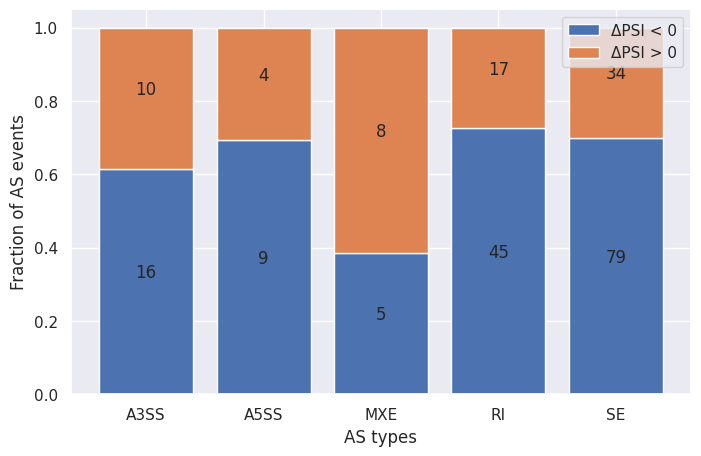

In [46]:
dir = "results/rMATs/sig"
files = os.listdir(dir)

dfs = []
for f in files:
    if f.endswith(".txt"):
        df = pd.read_csv(f"{dir}/{f}", sep="\t")
        df["file"] = f.split(".")[0]
        dfs.append(df)
df = pd.concat(dfs)
df = df[["file", "IncLevelDifference"]]
# count the number of IncLevelDifference >0 or <0 for every file
df_positive = df.groupby("file").agg(lambda x: (x > 0).sum())
df_negative = df.groupby("file").agg(lambda x: (x < 0).sum())
# join df_positive and df_negative, rename columns
df_count = pd.concat([df_positive, df_negative], axis=1)
df_count.columns = ["positive", "negative"]

plt.figure(figsize=(8, 5))
sns.set()
plt.bar(df_count.index, df_count["negative"] / df_count.sum(axis=1), label="ΔPSI < 0")
plt.bar(
    df_count.index,
    df_count["positive"] / df_count.sum(axis=1),
    bottom=df_count["negative"] / df_count.sum(axis=1),
    label="ΔPSI > 0",
)
plt.xlabel("AS types")
plt.ylabel("Fraction of AS events")
plt.legend()

# add text labels to the bars
for i, (pos, neg) in enumerate(zip(df_count["positive"], df_count["negative"])):
    plt.text(i, neg / df_count.sum(axis=1).iloc[i] * 0.5, neg, ha="center", va="bottom")
    plt.text(
        i,
        (0.5 * pos + neg) / df_count.sum(axis=1).iloc[i],
        pos,
        ha="center",
        va="bottom",
    )

plt.show()

# E. Distribution of ΔPSI in all significant AS events


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

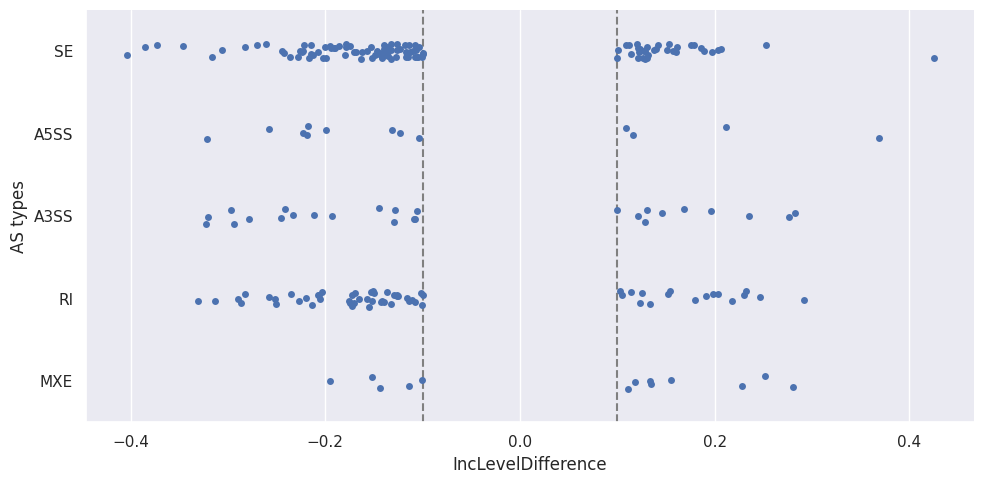

In [57]:
# dotplot of df, x is IncLevelDifference, y is file
plot = sns.catplot(
    data=df, x="IncLevelDifference", y="file", kind="strip", height=5, aspect=2
)
plot.set_axis_labels("IncLevelDifference", "AS types")
# add vertical lines at x=-0.1 and 0.1
plt.axvline(x=-0.1, color='grey', linestyle='dashed')
plt.axvline(x=0.1, color='grey', linestyle='dashed')
